# Python 與機器學習（5）

## 郭耀仁

## 迴歸問題

- [boston 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

```python
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)
print(boston.target)
print(boston.data)
```

## 迴歸問題（2）

- 先練習使用單變數（`RM`）預測目標變數（`MEDV`）

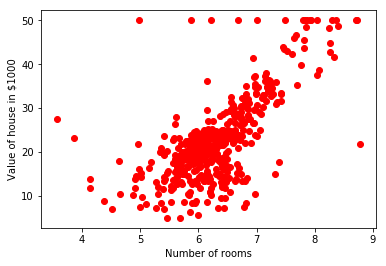

In [1]:
# 作圖
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston = load_boston()
X_rooms = boston.data[:, 5].reshape(-1, 1)
y = boston.target.reshape(-1, 1)
plt.scatter(X_rooms, y, c = 'r')
plt.ylabel("Value of house in $1000")
plt.xlabel("Number of rooms")
plt.show()

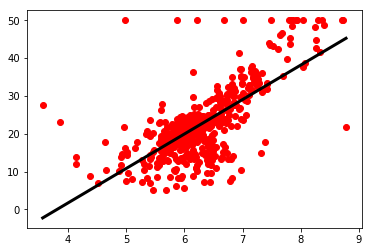

In [2]:
# Fitting on one feature
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
predictions_x = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, c = 'r')
plt.plot(predictions_x, reg.predict(predictions_x), c = 'k', lw = 3)
plt.show()

In [3]:
# Fitting on all feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = load_boston()
X = boston.data
y = boston.target.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
reg_all = linear_model.LinearRegression() 
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2: %.4f" % reg_all.score(X_test, y_test))
print("RMSE: %.4f" % rmse)

R^2: 0.6921
RMSE: 5.1046


## K 折交叉驗證

- 為了弭平訓練、測試樣本切分的誤差
- K-fold cross validation

![k-fold-cross-validation](https://storage.googleapis.com/py_ml_images/k-fold-cv.png)

In [4]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv_res = cross_val_score(reg, X, y, cv = 10)
print(cv_res)
print(np.mean(cv_res))

[ 0.73334917  0.47229799 -1.01097697  0.64126348  0.54709821  0.73610181
  0.37761817 -0.13026905 -0.78372253  0.41861839]
0.200137867354


In [5]:
# k 愈大自然需要計算的時間愈長
%timeit cross_val_score(reg, X, y, cv = 3)
%timeit cross_val_score(reg, X, y, cv = 10)

100 loops, best of 3: 2.72 ms per loop
100 loops, best of 3: 8.69 ms per loop


## 正規化迴歸

- 迴歸問題同樣有防止過度配適的機制：
    - Ridge Regression
    - LASSO

$$J(\theta)_{ridge} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \alpha \theta^2$$
$$J(\theta)_{lasso} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \alpha | \theta |$$

In [6]:
# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(ridge.score(X_test, y_test))

0.675198793543


In [7]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(lasso.score(X_test, y_test))

0.578895653073
